# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
employees = pd.read_csv('../data/employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
#Method without pivot
employees.groupby('Department')[['Salary']].mean()

#Sales has highest average salary

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2

#pd.pivot_table(employees, 'Salary', 'Department')

employees.pivot_table('Salary', 'Department')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
employees.pivot_table(values = 'Salary', index = ['Department', 'Title'])

#VPs from HR & IT have highest average salary
#Associates have higher salary than analysts

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
employees.pivot_table(values = ['Salary', 'Years'], index = ['Department', 'Title'])

#VPs have 8 years work experience

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
employees.pivot_table(values = ['Salary'], index = ['Department', 'Title'], aggfunc = ['mean', 'count'])

#So we have 2 VPs (HR & IT), 2 analysts in HR & 2 in IT, 1 assiociate in IT and 2 Sales Associates, so 9 in total

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
df = employees.pivot_table(values = ['Salary'], index = ['Department', 'Title'], aggfunc = ['median', 'max', 'min', 'std'])
print(df)

                     median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000


In [9]:
"""
Because of the small n (9 employees), the min, max, median are all close to each other (or even same) and therefore std dev is very low or 0 
"""
#paolo: ok remember that stddev of a single value is 0. (Pandas
# signals it with a NaN in this case)

'\nBecause of the small n (9 employees), the min, max, median are all close to each other (or even same) and therefore std dev is very low or 0 \n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
df.fillna(0)
#paolo: it is correct but why zero?

median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
employees.pivot_table(values = ['Salary'], index = ['Department'], aggfunc = ['sum', 'count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [12]:
employees.pivot_table(values = ['Years', 'Salary'], index = ['Department','Title'], aggfunc = {'Years' : 'sum', 'Salary' : 'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [14]:
fitbit = pd.read_csv('../data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [15]:
print(fitbit.info())
print('\n')
print(fitbit.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [16]:
fitbit[['Minutes Very Active', 'Steps']].corr()

#correlation is > 0.5, so we can say that there is a positive relationship between the two variables

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [17]:
import matplotlib.pyplot as plt

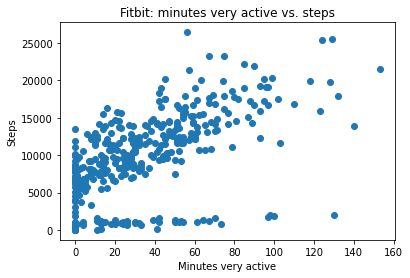

In [18]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Fitbit: minutes very active vs. steps')
plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [19]:
"""
How more minutes active this person is, the more steps he takes, which makes sense of course
There is also data that the person is very active but steps remain low (so apparently a sport where you do not move your feet :)
"""

'\nHow more minutes active this person is, the more steps he takes, which makes sense of course\nThere is also data that the person is very active but steps remain low (so apparently a sport where you do not move your feet :)\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [20]:
fitbit[['Minutes Sedentary', 'Steps']].corr()
# There is no relationship which makes sense. Minutes in rest does not correlate with number of steps

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

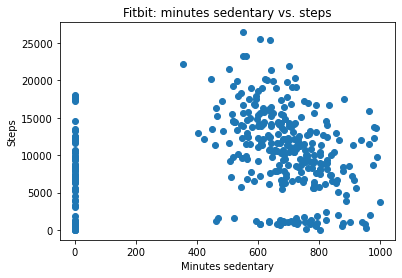

In [21]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Fitbit: minutes sedentary vs. steps')
plt.xlabel('Minutes sedentary')
plt.ylabel('Steps')
plt.show()

In [22]:
"""
#No correlation as discussed earlier
"""

'\n#No correlation as discussed earlier\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [23]:
fitbit[['MinutesOfSleep', 'Steps']].corr()
# There is no relationship/correlation

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

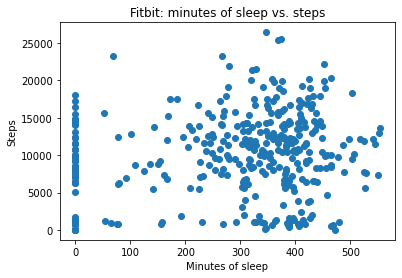

In [24]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Fitbit: minutes of sleep vs. steps')
plt.xlabel('Minutes of sleep')
plt.ylabel('Steps')
plt.show()

In [25]:
"""
#No correlation as discussed earlier
"""

'\n#No correlation as discussed earlier\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [26]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [27]:
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [28]:
cor_fit.sort_values('Steps', ascending = False)
#Only minutes very active is highly correlated

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [29]:
time_grades = pd.read_csv('../data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

7    4
9    3
8    2
3    2
5    1
4    1
2    1
1    1
Name: Grade, dtype: int64


<AxesSubplot:>

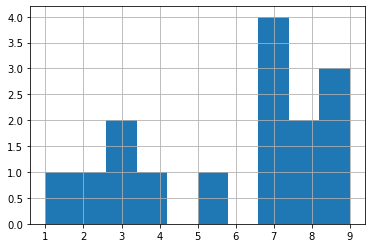

In [30]:
print(time_grades['Grade'].value_counts())

time_grades['Grade'].hist(bins=10)
#histogram of grades
#paolo: ok try also hist for studytime

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [31]:
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [32]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [33]:
time_grades.corr() 

#so standard parameter is pearson

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [34]:
"""
There is a high positive correlation between study time and grade using both methods (Spearman scores a bit higher)
"""

'\nThere is a high positive correlation between study time and grade using both methods (Spearman scores a bit higher)\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

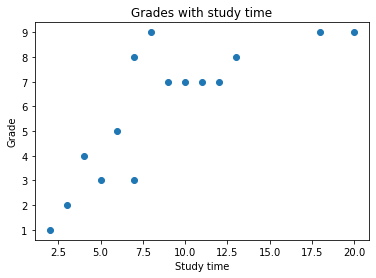

In [35]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Grades with study time')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [36]:
"""
Visually the same postive correlation between study time and grades can be seen
"""

'\nVisually the same postive correlation between study time and grades can be seen\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [37]:
"""
The Pearson correlation evaluates the LINEAR relationship between two continuous variables.
The Spearman correlation evaluates the MONOTONIC relationship between two continuous or ORDINAL variables
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

So in this case the spearman seems to be the one to use
"""

'\nThe Pearson correlation evaluates the LINEAR relationship between two continuous variables.\nThe Spearman correlation evaluates the MONOTONIC relationship between two continuous or ORDINAL variables\nThe Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.\n\nSo in this case the spearman seems to be the one to use\n'

In [38]:
#paolo check yes great lab!